In [10]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
rate_PR = pd.read_csv('Data/change.csv')

# get total change in crime & pop per police region per year
rate_PR = rate_PR.groupby(rate_PR['Police_Region']).sum()

# calculating change in crime/change in pop
rate_PR['rate_2012'] = rate_PR['CC_2012']/rate_PR['CP_2012']
rate_PR['rate_2013'] = rate_PR['CC_2013']/rate_PR['CP_2013']
rate_PR['rate_2014'] = rate_PR['CC_2014']/rate_PR['CP_2014']
rate_PR['rate_2015'] = rate_PR['CC_2015']/rate_PR['CP_2015']
rate_PR['rate_2016'] = rate_PR['CC_2016']/rate_PR['CP_2016']
rate_PR['rate_2017'] = rate_PR['CC_2017']/rate_PR['CP_2017']
rate_PR['rate_2018'] = rate_PR['CC_2018']/rate_PR['CP_2018']
rate_PR['rate_2019'] = rate_PR['CC_2019']/rate_PR['CP_2019']
rate_PR['rate_2020'] = rate_PR['CC_2019']/rate_PR['CP_2020']

# removing irrelevant columns
rate_PR = rate_PR[['rate_2012',
           'rate_2013','rate_2014','rate_2015','rate_2016','rate_2017','rate_2018','rate_2019', 'rate_2020']]

#rate_PR.to_csv('rates_by_PR.csv')

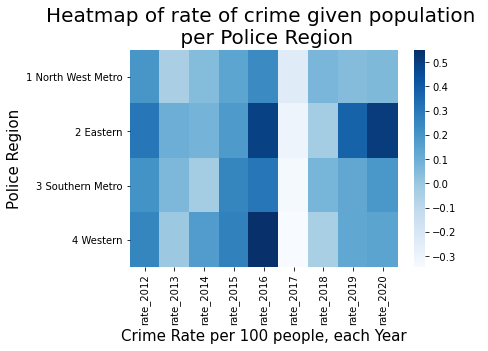

In [12]:
rates_heatmap = sns.heatmap(rate_PR[['rate_2012', 'rate_2013', 'rate_2014','rate_2015','rate_2016','rate_2017','rate_2018','rate_2019', 'rate_2020']],cmap='Blues')
plt.title('Heatmap of rate of crime given population \n per Police Region', fontsize = 20)
plt.xlabel('Crime Rate per 100 people, each Year',fontsize = 15)
plt.ylabel('Police Region',fontsize= 15)
plt.show()
#rates_heatmap.figure.savefig('rate_heatmap.png', bbox_inches='tight')

In [13]:
rates_PR = pd.read_csv('Data/rates_by_PR.csv')
rate = rates_PR.transpose()
years = ['region', 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
rate.insert(4, 'year', years)

rate.columns = ['North West Metro', 'Eastern', 'Southern Metro', 'Western', 'year']

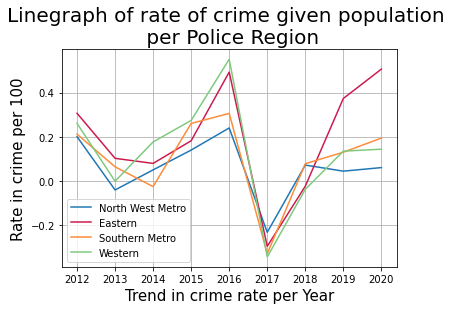

In [14]:
north_west = rate.loc[:, ['North West Metro', 'year']]
north_west = north_west.drop('Police_Region')
north_west = north_west.reset_index(drop=True).astype(float).set_index('year')
linegraph = sns.lineplot(data=north_west)

eastern = rate.loc[:, ['Eastern', 'year']]
eastern = eastern.drop('Police_Region')
eastern = eastern.reset_index(drop=True).astype(float).set_index('year')
linegraph = sns.lineplot(data=eastern, palette='rocket')

southern = rate.loc[:, ['Southern Metro', 'year']]
southern = southern.drop('Police_Region')
southern = southern.reset_index(drop=True).astype(float).set_index('year')
linegraph = sns.lineplot(data=southern, palette='Oranges')

western = rate.loc[:, ['Western', 'year']]
western = western.drop('Police_Region')
western = western.reset_index(drop=True).astype(float).set_index('year')
linegraph = sns.lineplot(data=western, palette='Accent')

linegraph.set(ylabel='rate')
linegraph.grid()
plt.title('Linegraph of rate of crime given population \n per Police Region', fontsize = 20)
plt.xlabel('Trend in crime rate per Year',fontsize = 15)
plt.ylabel('Rate in crime per 100',fontsize= 15)
plt.show()
linegraph.figure.savefig('linegraph', bbox_inches='tight')

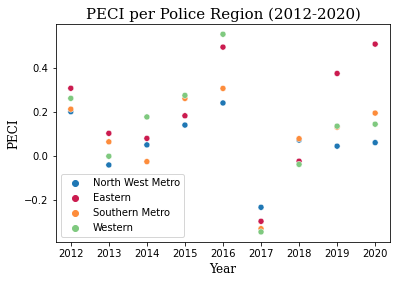

In [40]:
scatter = sns.scatterplot(data=north_west)
scatter = sns.scatterplot(data=eastern, palette='rocket')
scatter = sns.scatterplot(data=southern, palette='Oranges')
scatter = scatter = sns.scatterplot(data=western, palette='Accent')

font1 = {'family':'serif','color':'black','size':15}
font2 = {'family':'serif','color':'black','size':12}

plt.title('PECI per Police Region (2012-2020)', fontdict = font1)
plt.xlabel('Year',fontdict = font2)
plt.ylabel('PECI',fontdict = font2)
plt.show()
scatter.figure.savefig('Outputs/scatterplot',bbox_inches='tight', dpi=300)

In [38]:
import pandas as pd

data = pd.read_csv('Data/Combined.csv', encoding = 'UTF-8')

data = data[['2011_crime','2012_crime','2013_crime','2014_crime','2015_crime','2016_crime','2017_crime','2018_crime','2019_crime','2020_crime','2011_population','2012_population','2013_population','2014_population','2015_population','2016_population','2017_population','2018_population','2019_population','2020_population']]

data = data.replace(',','', regex=True)
data.apply(pd.to_numeric, errors='raise')

sum_column = data.sum(axis = 0, skipna = True)
crime = sum_column[['2011_crime','2012_crime','2013_crime','2014_crime','2015_crime','2016_crime','2017_crime','2018_crime','2019_crime','2020_crime']]
